## Dowloading the data (pictures of cats and dogs)

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-12-03 05:00:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 64.233.184.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   173MB/s    in 0.4s    

2021-12-03 05:00:12 (173 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip the downloaded file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/tmp/cats_and_dogs_filtered.zip")
zip_ref.extractall()
zip_ref.close()

## Walk through the directories

In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("cats_and_dogs_filtered"):
  print(f"There are {len(dirnames)} and {len(filenames)} images in {dirpath}")

There are 2 and 1 images in cats_and_dogs_filtered
There are 2 and 0 images in cats_and_dogs_filtered/validation
There are 0 and 500 images in cats_and_dogs_filtered/validation/cats
There are 0 and 500 images in cats_and_dogs_filtered/validation/dogs
There are 2 and 0 images in cats_and_dogs_filtered/train
There are 0 and 1000 images in cats_and_dogs_filtered/train/cats
There are 0 and 1000 images in cats_and_dogs_filtered/train/dogs


## Define the classes (cats and dogs)

The problem we are working in is a binary classfication problem which will classify based on two classes - Dogs or Cats

---



In [ ]:
class_names = os.listdir("cats_and_dogs_filtered/train")
class_names

['cats', 'dogs']

## Define the train and test directories

In [ ]:
train_dir = "cats_and_dogs_filtered/train"
test_dir = "cats_and_dogs_filtered/validation"

## View a random image from the any of the directories

In [ ]:
# Defining a function to view a random image from any of the directories
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  # Choose a random image
  random_image = random.choice(os.listdir(target_folder))
  # read the random image
  image = mpimg.imread(target_folder + "/" + random_image)
  plt.imshow(image);
  plt.axis("off")
  plt.title(target_class)
  print(image.shape)
  #return image

(375, 499, 3)


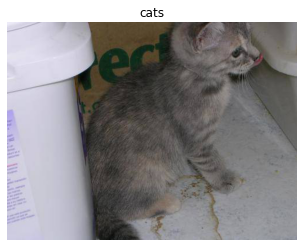

In [ ]:
# View the image from the directory using the view random image function created above
view_random_image(target_dir = "cats_and_dogs_filtered/train/", target_class = random.choice(class_names))

## Create Image Data Loaders using `ImageDataGenerator` object

1. Without data augmentation

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create training data generator object
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create testing data generator object
test_datagen = ImageDataGenerator(rescale=1/255.)

# Loading the training images using train_datagen
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42)

# Loading the testing images using test datagen
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


2. With data augmentation

In [ ]:
# Create training data generator object with image data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            shear_range=0.2,
                                            horizontal_flip=True)

# Loading the augmented training images using train_datagen_augmented object
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   seed=42)

Found 2000 images belonging to 2 classes.


## Building the models and training on the training images
We will be training images by buildinf the following models 
1. Fully connected Dense model
- with and without image data augmentation

2. Model using Convolutional Neural Networks
- with and without image data augmentation

3. Model using transfer learning (inception model)
- with and without image data augmentation


### 1. Fully connected Dense model

In [ ]:
# 1_0. Create the model (fully connected dense model without image data augmentation)
model_1_0 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224,224,3)),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid") # Dense unit of 1 and activation function of sigmoid because the problem is binary
])

# Compile the model
model_1_0.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
# Fit the model
history_1_0 = model_1_0.fit(train_data,
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10
63/63 [==============================] - 13s 176ms/step - loss: 4.5399 - accuracy: 0.5135 - val_loss: 1.0534 - val_accuracy: 0.5280
Epoch 2/10
63/63 [==============================] - 11s 177ms/step - loss: 1.6107 - accuracy: 0.5340 - val_loss: 3.0495 - val_accuracy: 0.5050
Epoch 3/10
63/63 [==============================] - 11s 172ms/step - loss: 1.1247 - accuracy: 0.5565 - val_loss: 1.3446 - val_accuracy: 0.5100
Epoch 4/10
63/63 [==============================] - 11s 171ms/step - loss: 0.8688 - accuracy: 0.5915 - val_loss: 1.5313 - val_accuracy: 0.5060
Epoch 5/10
63/63 [==============================] - 11s 176ms/step - loss: 1.0426 - accuracy: 0.5695 - val_loss: 1.0342 - val_accuracy: 0.5390
Epoch 6/10
63/63 [==============================] - 11s 173ms/step - loss: 0.6851 - accuracy: 0.6505 - val_loss: 0.7061 - val_accuracy: 0.5800
Epoch 7/10
63/63 [==============================] - 11s 174ms/step - loss: 0.8735 - accuracy: 0.6000 - val_loss: 0.7607 - val_accuracy: 0.5690

In [ ]:
# 1_1. Create the model (fully connected dense model with image data augmentation)
model_1_0 = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=(224,224,3)),
 tf.keras.layers.Dense(128, activation="relu"),
 tf.keras.layers.Dense(64, activation="relu"),
 tf.keras.layers.Dense(1, activation="sigmoid") # Dense unit of 1 and activation function of sigmoid because the problem is binary
])

# Compile the model
model_1_0.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])
# Fit the model
history_1_0 = model_1_0.fit(train_data_augmented,
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10
63/63 [==============================] - 33s 513ms/step - loss: 6.7681 - accuracy: 0.5015 - val_loss: 9.6511 - val_accuracy: 0.5000
Epoch 2/10
63/63 [==============================] - 32s 511ms/step - loss: 3.9844 - accuracy: 0.5315 - val_loss: 0.9302 - val_accuracy: 0.5600
Epoch 3/10
63/63 [==============================] - 32s 506ms/step - loss: 1.4932 - accuracy: 0.5265 - val_loss: 3.1532 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 32s 509ms/step - loss: 1.6750 - accuracy: 0.5380 - val_loss: 0.7699 - val_accuracy: 0.5540
Epoch 5/10
63/63 [==============================] - 32s 512ms/step - loss: 1.3120 - accuracy: 0.5160 - val_loss: 1.2253 - val_accuracy: 0.5240
Epoch 6/10
63/63 [==============================] - 32s 508ms/step - loss: 1.0009 - accuracy: 0.5235 - val_loss: 0.8981 - val_accuracy: 0.5340
Epoch 7/10
63/63 [==============================] - 32s 512ms/step - loss: 0.9182 - accuracy: 0.5255 - val_loss: 0.8540 - val_accuracy: 0.5370

### 2. Convolutional Neural Networks

In [ ]:
# 2_0. Create the model (model using Convolutional Neural Networks without image data augmentation)
model_2_0 = tf.keras.Sequential([ 
 tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2_0.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# Fit the model
history_2_0 = model_2_0.fit(train_data,
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10
63/63 [==============================] - 21s 199ms/step - loss: 0.7043 - accuracy: 0.5095 - val_loss: 0.6920 - val_accuracy: 0.5110
Epoch 2/10
63/63 [==============================] - 12s 192ms/step - loss: 0.6800 - accuracy: 0.5680 - val_loss: 0.6585 - val_accuracy: 0.5920
Epoch 3/10
63/63 [==============================] - 12s 192ms/step - loss: 0.6633 - accuracy: 0.6040 - val_loss: 0.6500 - val_accuracy: 0.5710
Epoch 4/10
63/63 [==============================] - 12s 191ms/step - loss: 0.6348 - accuracy: 0.6415 - val_loss: 0.6432 - val_accuracy: 0.6170
Epoch 5/10
63/63 [==============================] - 12s 194ms/step - loss: 0.5838 - accuracy: 0.6975 - val_loss: 0.5832 - val_accuracy: 0.6950
Epoch 6/10
63/63 [==============================] - 12s 194ms/step - loss: 0.5228 - accuracy: 0.7375 - val_loss: 0.5864 - val_accuracy: 0.6870
Epoch 7/10
63/63 [==============================] - 12s 197ms/step - loss: 0.4473 - accuracy: 0.7885 - val_loss: 0.5787 - val_accuracy: 0.7310

In [ ]:
# 2_1. Create the model (model using Convolutional Neural Networks with image data augmentation)
model_2_1 = tf.keras.Sequential([ 
 tf.keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=(224,224,3), activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Conv2D(32, 3, activation="relu"),
 tf.keras.layers.MaxPool2D(pool_size=2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2_1.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# Fit the model
history_2_1 = model_2_1.fit(train_data_augmented,
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

Epoch 1/10
63/63 [==============================] - 35s 538ms/step - loss: 0.7010 - accuracy: 0.5065 - val_loss: 0.6905 - val_accuracy: 0.5200
Epoch 2/10
63/63 [==============================] - 33s 531ms/step - loss: 0.6890 - accuracy: 0.5110 - val_loss: 0.6797 - val_accuracy: 0.5570
Epoch 3/10
63/63 [==============================] - 34s 537ms/step - loss: 0.6767 - accuracy: 0.5720 - val_loss: 0.6785 - val_accuracy: 0.5670
Epoch 4/10
63/63 [==============================] - 34s 538ms/step - loss: 0.6637 - accuracy: 0.5940 - val_loss: 0.6359 - val_accuracy: 0.6290
Epoch 5/10
63/63 [==============================] - 33s 532ms/step - loss: 0.6360 - accuracy: 0.6320 - val_loss: 0.6153 - val_accuracy: 0.6450
Epoch 6/10
63/63 [==============================] - 34s 538ms/step - loss: 0.6418 - accuracy: 0.6220 - val_loss: 0.6797 - val_accuracy: 0.5940
Epoch 7/10
63/63 [==============================] - 34s 538ms/step - loss: 0.6362 - accuracy: 0.6380 - val_loss: 0.6313 - val_accuracy: 0.6270

### 3. Transer Learning using Inception model


In [ ]:
# Use tranfer learning feature extraction layer
base_model = tf.keras.applications.InceptionV3(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model_3_0 = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model_3_0.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

# Fit the model
history_3_0 = model_3_0.fit(train_data,
                            epochs=10,
                            steps_per_epoch=len(train_data),
                            validation_data=test_data,
                            validation_steps=len(test_data))

87924736/87910968 [==============================] - 1s 0us/step
Epoch 1/10
63/63 [==============================] - 27s 316ms/step - loss: 0.0855 - accuracy: 0.9695 - val_loss: 0.0539 - val_accuracy: 0.9820
Epoch 2/10
63/63 [==============================] - 16s 254ms/step - loss: 0.0177 - accuracy: 0.9945 - val_loss: 0.0464 - val_accuracy: 0.9850
Epoch 3/10
63/63 [==============================] - 16s 256ms/step - loss: 0.0096 - accuracy: 0.9975 - val_loss: 0.0440 - val_accuracy: 0.9890
Epoch 4/10
63/63 [==============================] - 16s 253ms/step - loss: 0.0054 - accuracy: 0.9995 - val_loss: 0.0568 - val_accuracy: 0.9860
Epoch 5/10
63/63 [==============================] - 16s 254ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.0477 - val_accuracy: 0.9890
Epoch 6/10
63/63 [==============================] - 16s 253ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0494 - val_accuracy: 0.9870
Epoch 7/10
63/63 [==============================] - 16s 252ms/step - loss: 0.

## Creating a function to plot the loss curves and accuracy curves for any model

In [ ]:
## Creating a function to plot the loss and accuracy Curves
## Let's create a function to plot the loss and accuracy curves
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  acc = history.history["accuracy"]
  val_acc = history.history["val_accuracy"]

  epochs=range(len(loss))

  plt.figure(figsize=(10,7))
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="validation loss")
  plt.title("Training & Validation loss")
  plt.xlabel("epoch")
  plt.ylabel("loss")
  plt.legend(fontsize=14)
  plt.grid(True)

  plt.figure(figsize=(10,7))
  plt.plot(epochs, acc, label="training accuracy")
  plt.plot(epochs, val_acc, label="validation accuracy")
  plt.xlabel("epoch")
  plt.ylabel("accuracy")
  plt.legend(fontsize=14)
  plt.grid(True)

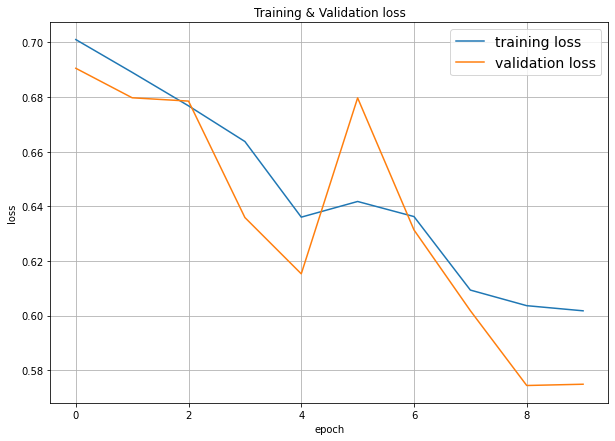

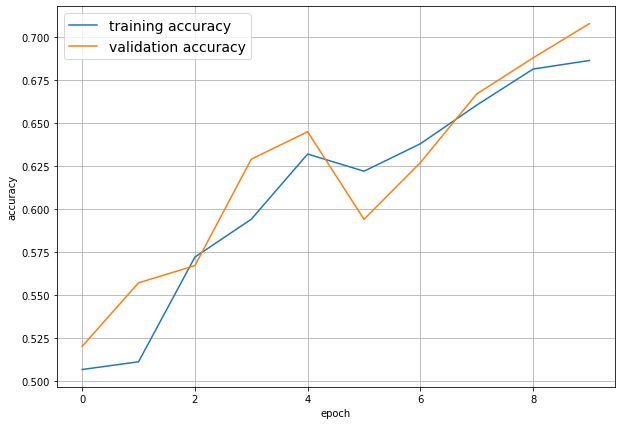

In [ ]:
plot_loss_curves(history_2_1)

## Creating a function to predict the class of an our own customized image

In [ ]:
## Creating a function to preprocess the image in the format our model requires
def load_and_prep_image(filepath, image_size=224):
  image = tf.io.read_file(filepath)
  image = tf.image.decode_image(image)
  image = tf.image.resize(image, size=[image_size, image_size])
  image = tf.expand_dims(image, axis=0)
  image = image/255.
  return image

In [ ]:
## Creating a function to predict the class of the image
def pred_image(model, filepath):
  image = load_and_prep_image(filepath)
  img = plt.imread(filepath)
  plt.imshow(img)
  plt.axis("off")
  pred = int(model.predict(image))
  print(f"prediction = {pred}\n")
  print(f"class_name = {class_names[pred]}")

prediction = 0

class_name = cats


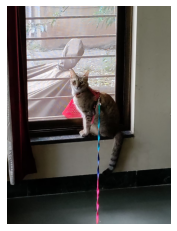

In [ ]:
pred_image(model_2_1, "/content/Raechel_4.jpg")